# Modelo de machine learning previsões para colheitas

**Rafael Henrique Gallo**

Modelo de machine learning um classificador.
Nesse modelo a empresa Scicrop disponibilizou os datasets realizar a previsão de saúde e qualidade de colheitas das safras.

**3 classes**

1 - Colheita sofreu dano por pesticidas.

2 - Uma colheita saudável.

3 - Se a colheita sofreu motivos diversos.

**Algortimo usados K-NN, Naive bayes, Random Forest**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("Safra_2018-2019.csv")
df_prev = pd.read_csv("Safra_2020.csv")

In [3]:
df_train.head()

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,4,SCROP00005,342,1,0,1,0,0.0,0,2,1


In [4]:
df_prev.head()

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
0,80000,SCROP80001,256,0,1,2,35,11.0,9,1
1,80001,SCROP80002,283,0,1,2,5,5.0,6,1
2,80002,SCROP80003,283,0,1,2,15,15.0,5,2
3,80003,SCROP80004,283,0,1,2,15,NaN,7,2
4,80004,SCROP80005,283,0,1,2,15,19.0,2,1


**Limpeza de dados**

In [5]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8858 entries, 0 to 8857
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                8858 non-null   int64  
 1   Identificador_Agricultor  8858 non-null   object 
 2   Estimativa_de_Insetos     8858 non-null   int64  
 3   Tipo_de_Cultivo           8858 non-null   int64  
 4   Tipo_de_Solo              8858 non-null   int64  
 5   Categoria_Pesticida       8858 non-null   int64  
 6   Doses_Semana              8858 non-null   int64  
 7   Semanas_Utilizando        7913 non-null   float64
 8   Semanas_Sem_Uso           8858 non-null   int64  
 9   Temporada                 8858 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 692.2+ KB


In [6]:
df_prev.isnull().sum()

Unnamed: 0                    0
Identificador_Agricultor      0
Estimativa_de_Insetos         0
Tipo_de_Cultivo               0
Tipo_de_Solo                  0
Categoria_Pesticida           0
Doses_Semana                  0
Semanas_Utilizando          945
Semanas_Sem_Uso               0
Temporada                     0
dtype: int64

In [7]:
df_prev.drop("Identificador_Agricultor", inplace = True, axis = 1)

In [8]:
# Features visualizados
df_prev.head()

,Unnamed: 0,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
0,80000,256,0,1,2,35,11.0,9,1
1,80001,283,0,1,2,5,5.0,6,1
2,80002,283,0,1,2,15,15.0,5,2
3,80003,283,0,1,2,15,NaN,7,2
4,80004,283,0,1,2,15,19.0,2,1


# Estatistica

**Dados a media, mediana da safra**

In [9]:
df_train.describe()

,Unnamed: 0,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,71945.000000,80000.000000,80000.000000,80000.000000
mean,39999.500000,1400.020875,0.283338,0.455550,2.267587,25.846750,28.664480,9.549088,1.897575,0.192312
std,23094.155105,849.792471,0.450622,0.498023,0.463748,15.557246,12.424751,9.905547,0.702079,0.455912
min,0.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,19999.750000,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,39999.500000,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,59999.250000,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,79999.000000,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [10]:
df_prev.describe()

,Unnamed: 0,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
count,8858.000000,8858.000000,8858.000000,8858.000000,8858.000000,8858.000000,7913.000000,8858.000000,8858.000000
mean,84428.500000,1389.902574,0.293746,0.484308,2.233461,25.878867,28.255655,9.959359,1.891398
std,2557.228676,842.295394,0.455503,0.499782,0.442366,15.529796,12.083474,9.848986,0.694461
min,80000.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,82214.250000,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,84428.500000,1212.000000,0.000000,0.000000,2.000000,20.000000,27.000000,8.000000,2.000000
75%,86642.750000,1898.000000,1.000000,1.000000,2.000000,40.000000,37.000000,16.000000,2.000000
max,88857.000000,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


In [11]:
# Média

media_geral = df_prev.Estimativa_de_Insetos.mean()
print("A média geral é de {}". format(media_geral))

A média geral é de 1389.902573944457


In [12]:
#Mediana

mediana = df_prev.Estimativa_de_Insetos.median()
print("A mediana geral é de {}". format(mediana))

A mediana geral é de 1212.0


# Análise exploratória de dados da safra 2020

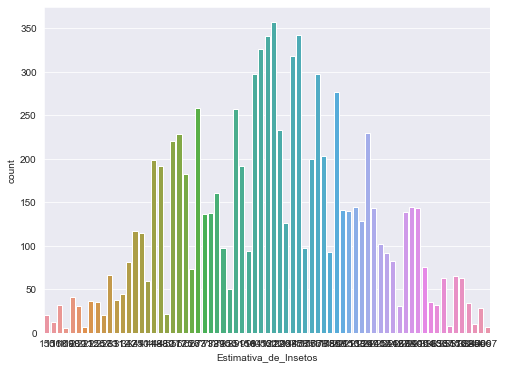

In [13]:
df = plt.figure(figsize=(8, 6))

sns.countplot(x="Estimativa_de_Insetos", data=df_prev)

Text(0.5, 1.0, 'Safra')

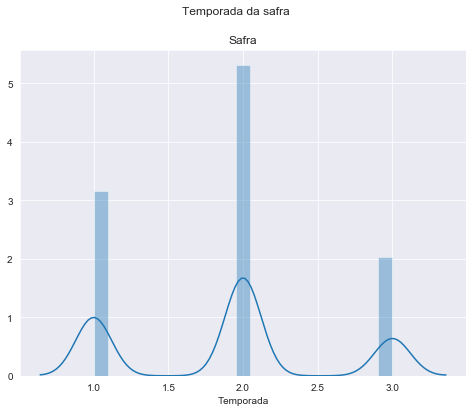

In [14]:
df = plt.figure(figsize=(8, 6))

x1 = sns.distplot(df_prev['Temporada'], kde=True)
x1.figure.suptitle('Temporada da safra')
x1.set_title('Safra')

Text(0.5, 1.0, 'Safra')

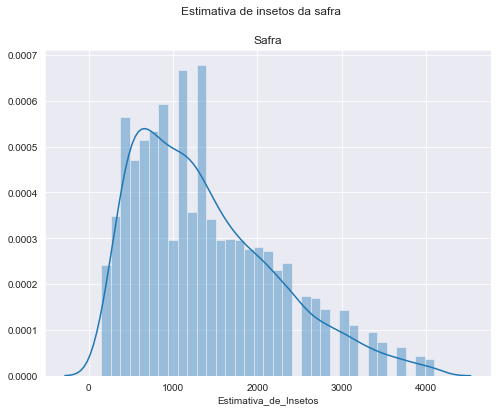

In [15]:
df = plt.figure(figsize=(8, 6))

x2 = sns.distplot(df_prev['Estimativa_de_Insetos'], kde = True)
x2.figure.suptitle('Estimativa de insetos da safra')
x2.set_title('Safra')

Text(0.5, 1.0, 'Safra')

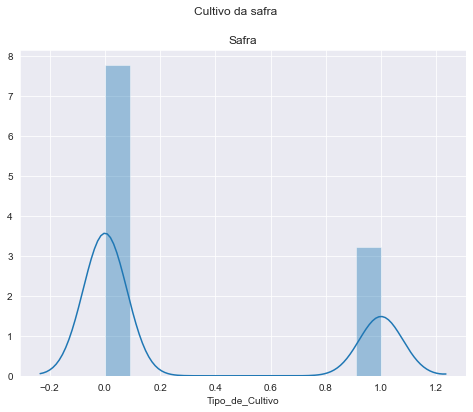

In [16]:
df = plt.figure(figsize=(8, 6))

x3 = sns.distplot(df_prev["Tipo_de_Cultivo"], kde = True)
x3.figure.suptitle('Cultivo da safra')
x3.set_title('Safra')

Text(0.5, 1.0, 'Pesticida')

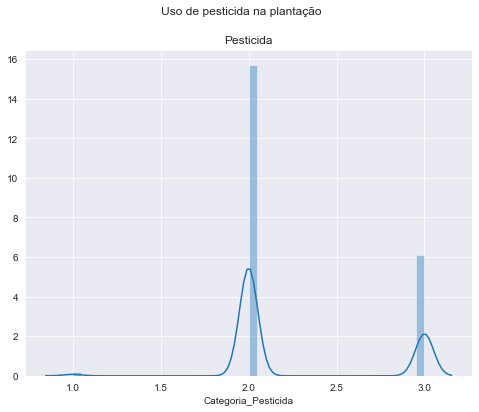

In [17]:
df = plt.figure(figsize=(8, 6))

x4 = sns.distplot(df_train["Categoria_Pesticida"], kde = True)
x4.figure.suptitle("Uso de pesticida na plantação")
x4.set_title("Pesticida")

Text(0.5, 1.0, 'Cultivo')

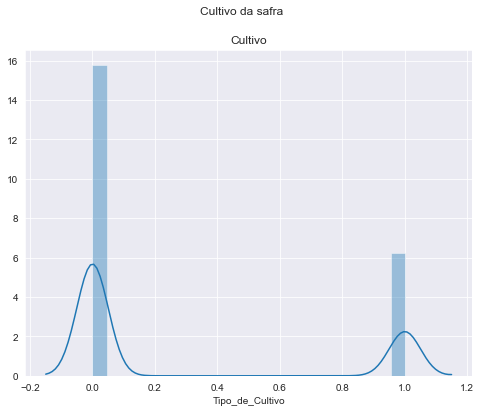

In [18]:
df = plt.figure(figsize=(8, 6))

x5 = sns.distplot(df_train["Tipo_de_Cultivo"], kde = True)
x5.figure.suptitle("Cultivo da safra")
x5.set_title("Cultivo")

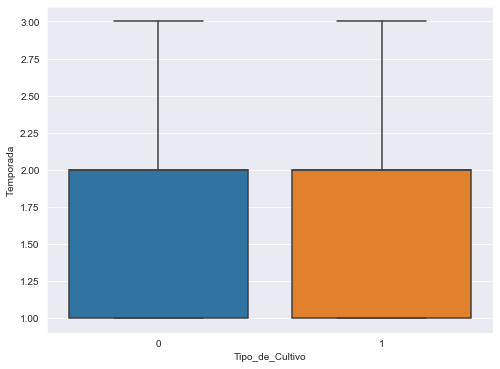

In [19]:
df = plt.figure(figsize=(8, 6))

sns.boxplot(x="Tipo_de_Cultivo", y="Temporada", data=df_train)

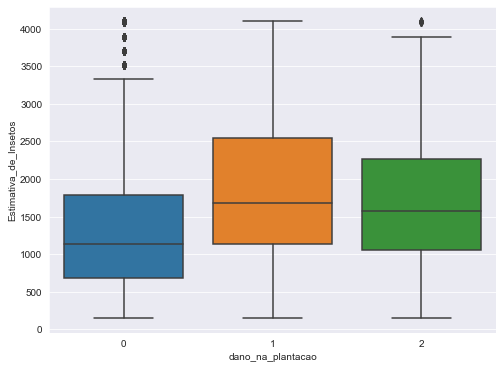

In [20]:
df = plt.figure(figsize=(8, 6))

sns.boxplot(x="dano_na_plantacao", y="Estimativa_de_Insetos", data=df_train)

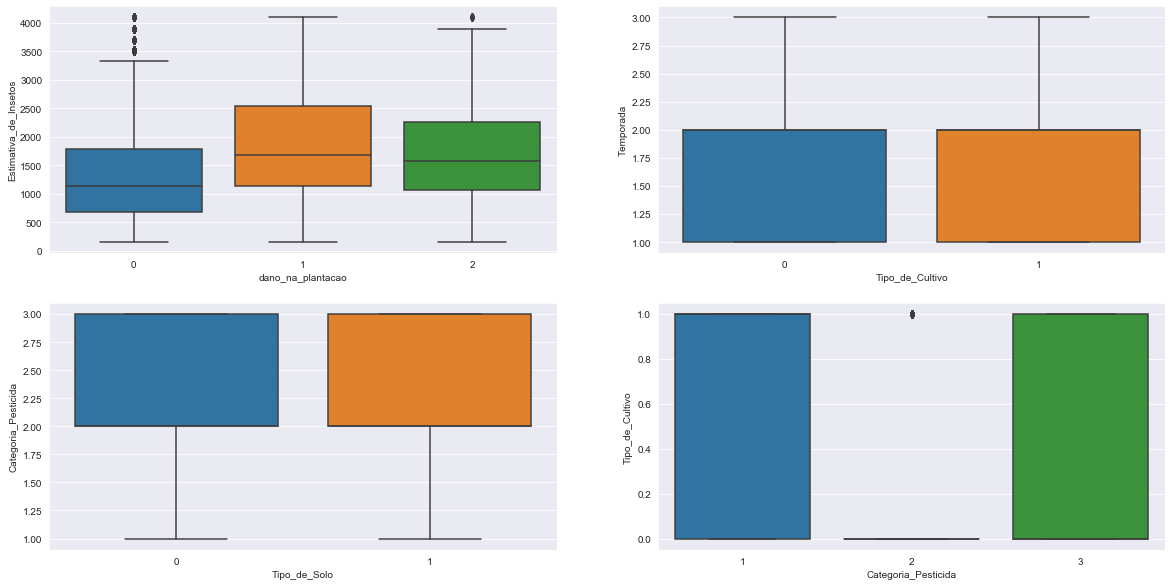

In [21]:
df = plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
df = sns.boxplot(x="dano_na_plantacao", y="Estimativa_de_Insetos", data=df_train)
plt.subplot(2,2,2)
df = sns.boxplot(x="Tipo_de_Cultivo", y="Temporada", data=df_train)
plt.subplot(2,2,3)
df = sns.boxplot(x="Tipo_de_Solo", y="Categoria_Pesticida", data=df_train)
plt.subplot(2,2,4)
df = sns.boxplot(x="Categoria_Pesticida", y="Tipo_de_Cultivo", data=df_train)

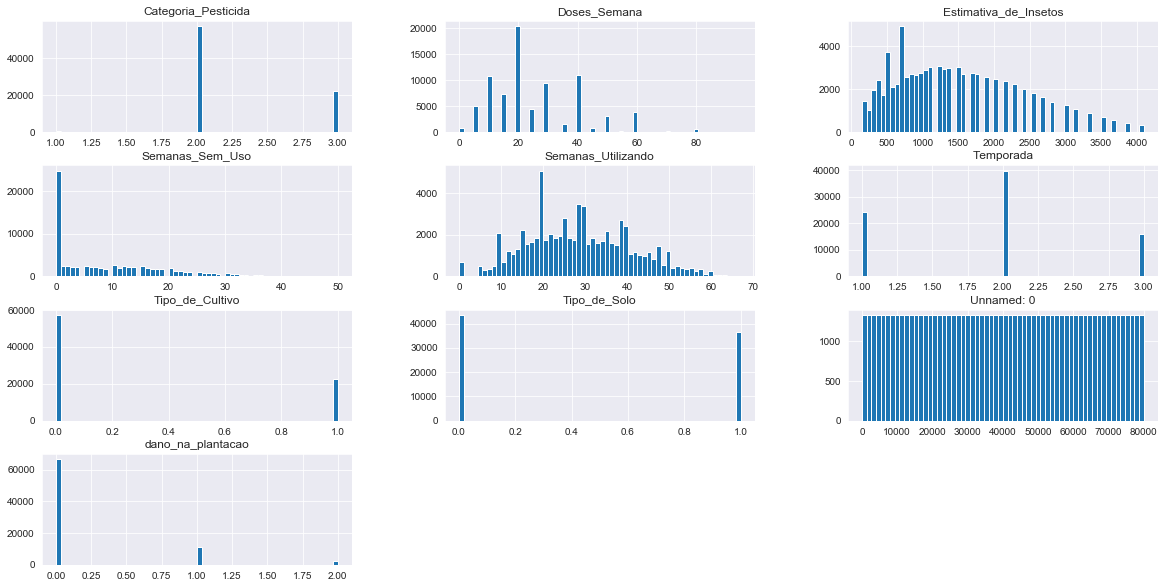

In [22]:
df_train.hist(bins = 60, figsize=(20, 10))
plt.show()

# Modelo machine learning

In [23]:
df_prev.corr()

,Unnamed: 0,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
Unnamed: 0,1.000000,0.076178,0.038461,-0.082679,-0.056800,-0.013689,0.017531,0.057247,-0.009782
Estimativa_de_Insetos,0.076178,1.000000,-0.077514,-0.057919,-0.073074,-0.108416,0.425290,0.303924,-0.003878
Tipo_de_Cultivo,0.038461,-0.077514,1.000000,-0.365603,0.209861,-0.203690,-0.033672,-0.211736,-0.003361
Tipo_de_Solo,-0.082679,-0.057919,-0.365603,1.000000,0.005337,0.105314,-0.083371,0.036570,0.005174
Categoria_Pesticida,-0.056800,-0.073074,0.209861,0.005337,1.000000,-0.008916,0.345346,-0.533731,0.017858
Doses_Semana,-0.013689,-0.108416,-0.203690,0.105314,-0.008916,1.000000,0.149966,-0.064423,0.006391
Semanas_Utilizando,0.017531,0.425290,-0.033672,-0.083371,0.345346,0.149966,1.000000,-0.461917,0.027372
Semanas_Sem_Uso,0.057247,0.303924,-0.211736,0.036570,-0.533731,-0.064423,-0.461917,1.000000,-0.023178
Temporada,-0.009782,-0.003878,-0.003361,0.005174,0.017858,0.006391,0.027372,-0.023178,1.000000


In [24]:
from sklearn.preprocessing import StandardScaler

train = df_prev.iloc[:, 1:4].values
test = df_prev.iloc[:, 4].values

#Scaler transforma todas as features em uma mesma escala.
scaler = StandardScaler()
train = scaler.fit_transform(train)
train

array([[-1.34628135, -0.64491915,  1.03189237],
       [-1.31422428, -0.64491915,  1.03189237],
       [-1.31422428, -0.64491915,  1.03189237],
       ...,
       [ 2.52431328,  1.55058195, -0.96909332],
       [ 2.74515088,  1.55058195, -0.96909332],
       [ 2.97429958,  1.55058195, -0.96909332]])

In [25]:
#pipeline para automatizar o preenchimento dos valores

from sklearn.impute import SimpleImputer

Imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
Imputer = Imputer.fit(train[:, 1:4])
train[:, 1:4] = Imputer.transform(train[:, 1:4])
train

array([[-1.34628135, -0.64491915,  1.03189237],
       [-1.31422428, -0.64491915,  1.03189237],
       [-1.31422428, -0.64491915,  1.03189237],
       ...,
       [ 2.52431328,  1.55058195, -0.96909332],
       [ 2.74515088,  1.55058195, -0.96909332],
       [ 2.97429958,  1.55058195, -0.96909332]])

In [26]:
#Treino teste do modelo para treinar o modelo 

from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.3)

In [27]:
#Algoritmo Naive bayes
#valor da acuracia do modelo de naive_bayes

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(X_train, y_train)
naive_prev = naive.predict(x_test)
print(naive_prev)
print("Accuracy:",metrics.accuracy_score(y_test, naive_prev))

[2 2 2 ... 2 2 2]
Accuracy: 0.7516930022573364


In [28]:
#Algoritmo K-NN 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8, metric = "minkowski", p = 2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(x_test)
print(knn_pred)
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

[2 2 2 ... 2 2 2]
Accuracy: 0.8073739653875094


In [29]:
#Algoritmo Random Forest
from sklearn.ensemble import RandomForestClassifier

Random = RandomForestClassifier(n_estimators = 200)
Random.fit(X_train, y_train)
Random = Random.predict(x_test)
print(Random)
print("Accuracy:",metrics.accuracy_score(y_test, Random))

[2 2 2 ... 2 2 2]
Accuracy: 0.8088788562829194


In [30]:
#valor da acuracia 
# Valor da matrix de confussão
from sklearn.metrics import confusion_matrix, accuracy_score

acurácia_naive_bayes = accuracy_score(y_test, naive_prev)
acurácia_KNN = accuracy_score(y_test, knn_pred)
acurácia_Random = accuracy_score(y_test, Random)

matrix_naive_bayes = confusion_matrix(y_test, naive_prev)
matrix_KNN = confusion_matrix(y_test, knn_pred)
matrix_Random = confusion_matrix(y_test, Random)

print("Acurácia Naive bayes: %.2f" % (acurácia_naive_bayes * 100))
print("Acurácia K-NN: %.2f" % (acurácia_KNN * 100))
print("Acurácia Random Forest: %.2f" % (acurácia_Random * 100))

Acurácia Naive bayes: 75.17
Acurácia K-NN: 80.74
Acurácia Random Forest: 80.89


In [31]:
#Classificação de algoritmos K-NN, Naive bayes, Random florest

from sklearn.metrics import confusion_matrix,classification_report

matrix = classification_report(y_test, naive_prev)
print("Classificaçao do Naive Bayes: \n", matrix)

Classificaçao do Naive Bayes: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.76      0.98      0.86      2001
           3       0.47      0.06      0.10       630

    accuracy                           0.75      2658
   macro avg       0.41      0.35      0.32      2658
weighted avg       0.68      0.75      0.67      2658



C:\Users\RafaelHenriqueGallo\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
matrix = classification_report(y_test, knn_pred)
print("Classificaçao do  K-NN: \n", matrix)

Classificaçao do  K-NN: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.81      0.98      0.89      2001
           3       0.83      0.28      0.42       630

    accuracy                           0.81      2658
   macro avg       0.54      0.42      0.43      2658
weighted avg       0.80      0.81      0.77      2658



C:\Users\RafaelHenriqueGallo\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
matrix = classification_report(y_test, Random)
print("Classificaçao do Random Forest: \n", matrix)

C:\Users\RafaelHenriqueGallo\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classificaçao do Random Forest: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.81      0.99      0.89      2001
           3       0.84      0.28      0.42       630

    accuracy                           0.81      2658
   macro avg       0.55      0.42      0.44      2658
weighted avg       0.81      0.81      0.77      2658



**Graficos da matriz de Confusão**

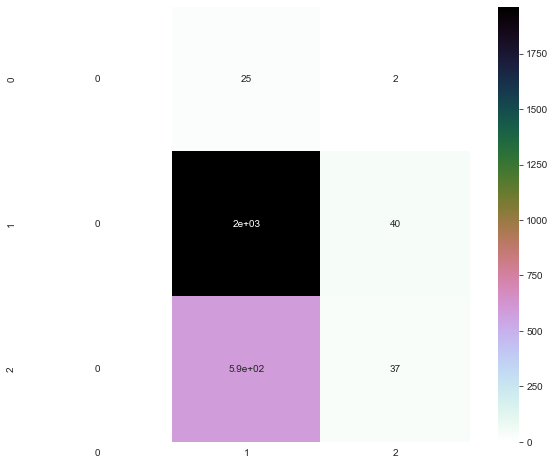

In [34]:
plt.figure(figsize=(10,8))

sns.heatmap(matrix_naive_bayes, annot = True,cmap = 'cubehelix_r')
plt.show()

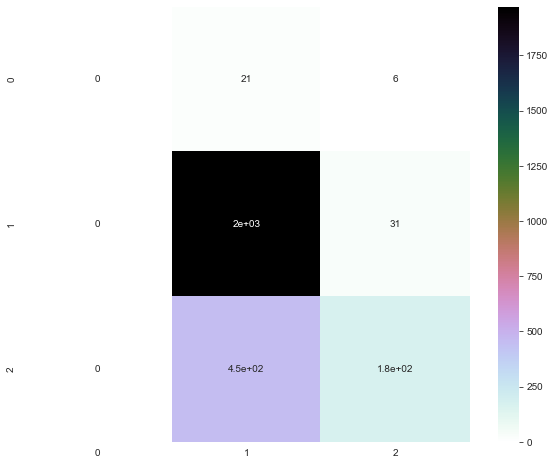

In [35]:
plt.figure(figsize=(10,8))

sns.heatmap(matrix_KNN, annot = True,cmap = 'cubehelix_r')
plt.show()

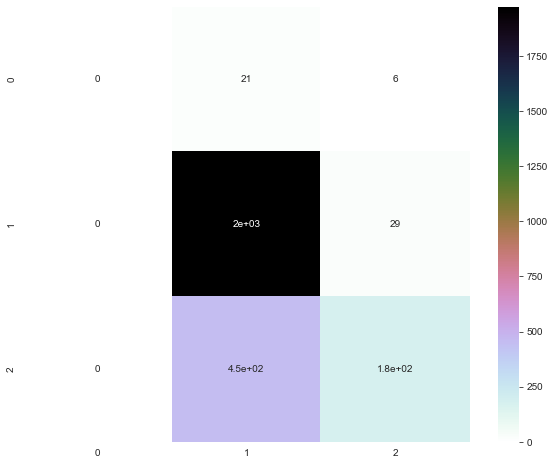

In [36]:
plt.figure(figsize=(10,8))

sns.heatmap(matrix_Random, annot = True,cmap = 'cubehelix_r')
plt.show()